**This notebook is an exercise in the [Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/categorical-variables).**

---


By encoding **categorical variables**, you'll obtain your best results thus far!

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [1]:
# Set up code checking
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 

print("Setup Complete")

Setup Complete


In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# Read the data
houses = pd.read_csv('../input/train.csv', index_col='Id') 
houses_test = pd.read_csv('../input/test.csv', index_col='Id')

In [3]:
X = houses.copy()
X_test = houses_test.copy()
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.pop('SalePrice')

features_num = [col for col in X.columns if X[col].dtype != "object"]
features_cat = [col for col in X.columns if X[col].dtype == "object"]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train).toarray()
X_valid = preprocessor.transform(X_valid).toarray()
X_test = preprocessor.transform(X_test).toarray()

input_shape = [X_train.shape[1]]

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

# Model Shape
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1)
])

2022-04-07 02:13:06.517098: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model.compile(
    optimizer='adam',
    loss='mae',
)

2022-04-07 02:13:06.837795: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5000
18/18 [==============================] - 2s 34ms/step - loss: 181116.1406 - val_loss: 180335.0625
Epoch 2/5000
18/18 [==============================] - 0s 14ms/step - loss: 181115.6719 - val_loss: 180334.5469
Epoch 3/5000
18/18 [==============================] - 0s 14ms/step - loss: 181114.8750 - val_loss: 180334.0312
Epoch 4/5000
18/18 [==============================] - 0s 14ms/step - loss: 181114.1406 - val_loss: 180333.2969
Epoch 5/5000
18/18 [==============================] - 0s 13ms/step - loss: 181112.8438 - val_loss: 180332.3750
Epoch 6/5000
18/18 [==============================] - 0s 13ms/step - loss: 181111.1094 - val_loss: 180330.8438
Epoch 7/5000
18/18 [==============================] - 0s 14ms/step - loss: 181108.7969 - val_loss: 180328.8438
Epoch 8/5000
18/18 [==============================] - 0s 14ms/step - loss: 181105.9375 - val_loss: 180326.2188
Epoch 9/5000
18/18 [==============================] - 0s 14ms/step - loss: 181102.2500 - val_loss: 180322.7500
E

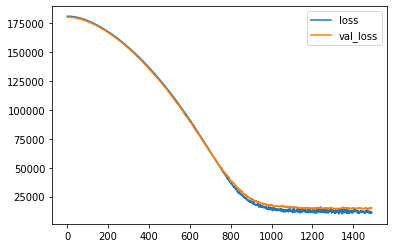

In [6]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=100,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=5000,
    callbacks=[early_stopping]
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [7]:
preds_test = model.predict(X_test)

# Save test predictions to file
output = pd.DataFrame({'Id': houses_test.index,
                       'SalePrice': preds_test[:,0]})
output.to_csv('submission.csv', index=False)

# Generate test predictions and submit your results

After you complete Step 4, if you'd like to use what you've learned to submit your results to the leaderboard, you'll need to preprocess the test data before generating predictions.

**This step is completely optional, and you do not need to submit results to the leaderboard to successfully complete the exercise.**

Check out the previous exercise if you need help with remembering how to [join the competition](https://www.kaggle.com/c/home-data-for-ml-course) or save your results to CSV.  Once you have generated a file with your results, follow the instructions below:
1. Begin by clicking on the **Save Version** button in the top right corner of the window.  This will generate a pop-up window.  
2. Ensure that the **Save and Run All** option is selected, and then click on the **Save** button.
3. This generates a window in the bottom left corner of the notebook.  After it has finished running, click on the number to the right of the **Save Version** button.  This pulls up a list of versions on the right of the screen.  Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
4. Click on the **Output** tab on the right of the screen.  Then, click on the file you would like to submit, and click on the **Submit** button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

If you want to keep working to improve your performance, select the **Edit** button in the top right of the screen. Then you can change your code and repeat the process. There's a lot of room to improve, and you will climb up the leaderboard as you work.


---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intermediate-machine-learning/discussion) to chat with other learners.*